In [1]:
import scipy
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd
from pathlib import Path
from energy_vad import multi_plots, naive_frame_energy_vad, write_vad_to_rttm_file, load_and_split_segments, save_segments_to_ctm_file, run_energy_vad_on_manifest


In [62]:
# data_dir = Path("/media/data/datasets/vad_sd/multilingual_vad/mandarin/aishell2/audio/dev/wav/") # 0
# data_dir = Path("/media/data/datasets/vad_sd/multilingual_vad/french/data/french/mls/audio/train/mls/") # 0
# data_dir = Path("/media/data/datasets/vad_sd/multilingual_vad/german/audio/train/wav/")  # 0
# data_dir = Path("/media/data/datasets/vad_sd/multilingual_vad/russian/data/russian/ruls/audio/")
data_dir = Path("/media/data/datasets/vad_sd/multilingual_vad/spanish/data/spanish/mls/audio/train/wav/")

wav_list = list(data_dir.glob("**/*.wav"))
print(len(wav_list))
print(wav_list[:3])

159901
[PosixPath('/media/data/datasets/vad_sd/multilingual_vad/spanish/data/spanish/mls/audio/train/wav/8304/7613/8304_7613_000085.wav'), PosixPath('/media/data/datasets/vad_sd/multilingual_vad/spanish/data/spanish/mls/audio/train/wav/8304/7613/8304_7613_000126.wav'), PosixPath('/media/data/datasets/vad_sd/multilingual_vad/spanish/data/spanish/mls/audio/train/wav/8304/7613/8304_7613_000084.wav')]


/media/data/datasets/vad_sd/multilingual_vad/spanish/data/spanish/mls/audio/train/wav/11797/11957/11797_11957_000506.wav


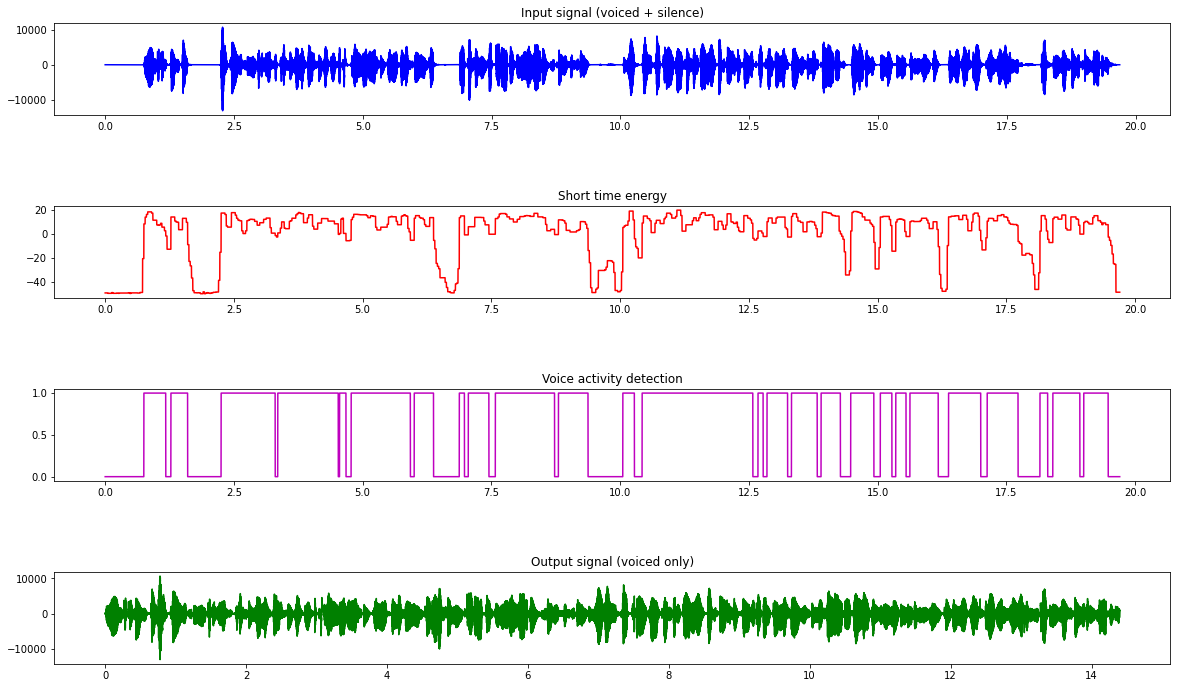

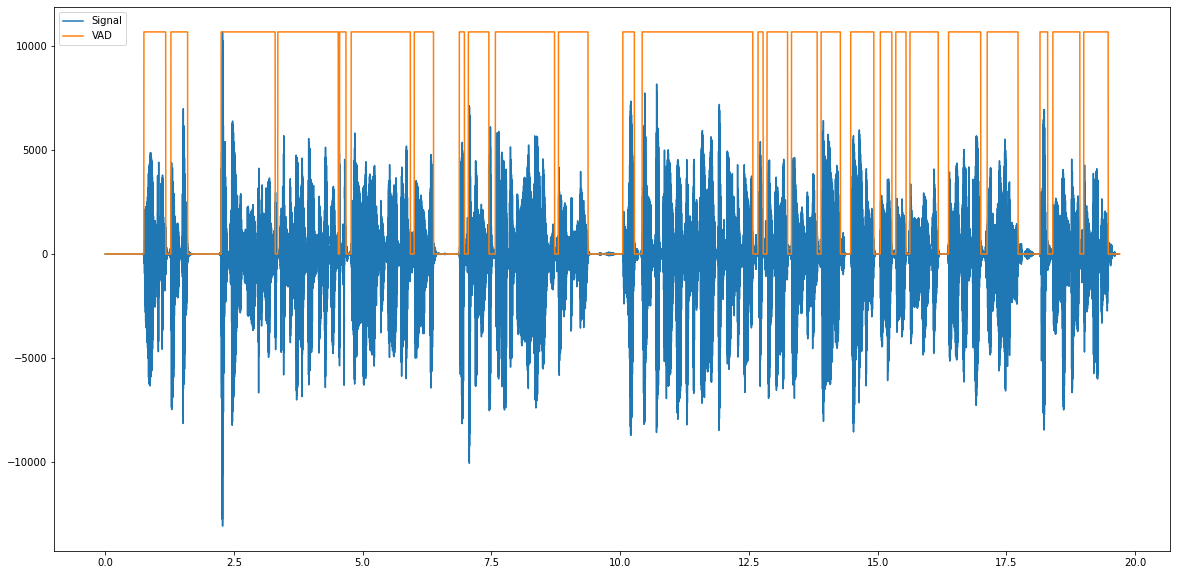

In [70]:
idx = np.random.choice(len(wav_list))
fname = wav_list[idx]
print(fname)

# fname = "/media/data/datasets/vad_sd/multilingual_vad/mandarin/aishell2/audio/dev/wav/D0012/ID0012W0162.wav"

fs, sig = scipy.io.wavfile.read(fname)
sig = sig + 1e-10
#########################
# naive_frame_energy_vad
#########################
# get voiced frames
energy, vad, voiced = naive_frame_energy_vad(sig, fs, threshold=0, win_len=0.025, win_hop=0.025, zero_mean=True)

# plot results
multi_plots(data=[sig, energy, vad, voiced],
            titles=["Input signal (voiced + silence)", "Short time energy",
                    "Voice activity detection", "Output signal (voiced only)"],
            fs=fs, plot_rows=4, step=1)

ipd.Audio(voiced, rate=fs)

In [67]:
ipd.Audio(sig, rate=fs)

In [46]:
rttm_file = "./dummy_rttm.rttm"
ctm_file = "./dummy_ctm.ctm"
write_vad_to_rttm_file(fname, vad, rttm_file, sample_rate=16000, max_speakers=100)
word_segments = load_and_split_segments(rttm_file)
save_segments_to_ctm_file(word_segments, ctm_file)

In [2]:
manifest_dir = Path("/media/data/projects/NeMo-fvad/vad_code/manifests_cleaned/train/")
manifest_list = [
    manifest_dir / "french_train_40ms_local_cleaned.json",
    manifest_dir / "german_train_40ms_local_cleaned.json",
    manifest_dir / "russian_train_40ms_local_cleaned.json",
    manifest_dir / "spanish_train_40ms_local_cleaned.json",
    manifest_dir / "mandarin_train_40ms_local_cleaned.json",
]

In [3]:
import os
output_root = Path("/media/data2/datasets/multilang_vad_ctm_th0")
if output_root.is_dir():
    os.system(f"rm -rf {output_root}")
for manifest_file in manifest_list:
    output_dir = output_root / manifest_file.stem.split("_")[0]
    print(manifest_file)
    print(output_dir)
    run_energy_vad_on_manifest(str(manifest_file), str(output_dir), threshold=0, enable_ctm=True)

/media/data/projects/NeMo-fvad/vad_code/manifests_cleaned/train/french_train_40ms_local_cleaned.json
/media/data2/datasets/multilang_vad_ctm_th0/french
Loading manifest file...


Running energy VAD:  12%|█████▍                                       | 19943/165937 [10:53<1:03:15, 38.46it/s]/home/heh/anaconda3/envs/nemo/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
Running energy VAD:  12%|█████▍                                       | 19943/165937 [11:09<1:03:15, 38.46it/s]

Error reading /media/data/datasets/vad_sd/multilingual_vad/french/data/french/mls/audio/train/mls/1474_1259_009563.wav


Running energy VAD:  12%|█████▎                                      | 19956/165937 [11:26<47:15:39,  1.17s/it]/home/heh/anaconda3/envs/nemo/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error reading /media/data/datasets/vad_sd/multilingual_vad/french/data/french/mls/audio/train/mls/1474_1259_009580.wav


/home/heh/anaconda3/envs/nemo/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/home/heh/anaconda3/envs/nemo/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error reading /media/data/datasets/vad_sd/multilingual_vad/french/data/french/mls/audio/train/mls/1474_1259_009566.wav


/home/heh/anaconda3/envs/nemo/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error reading /media/data/datasets/vad_sd/multilingual_vad/french/data/french/mls/audio/train/mls/1474_1259_009579.wav


/home/heh/anaconda3/envs/nemo/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
Running energy VAD:  12%|█████▎                                      | 19962/165937 [11:49<40:14:43,  1.01it/s]

Error reading /media/data/datasets/vad_sd/multilingual_vad/french/data/french/mls/audio/train/mls/1474_1259_009573.wav


Running energy VAD: 100%|████████████████████████████████████████████| 165937/165937 [1:30:19<00:00, 30.62it/s]


/media/data/projects/NeMo-fvad/vad_code/manifests_cleaned/train/german_train_40ms_local_cleaned.json
/media/data2/datasets/multilang_vad_ctm_th0/german
Loading manifest file...


Running energy VAD: 100%|████████████████████████████████████████████| 359547/359547 [1:12:53<00:00, 82.21it/s]


/media/data/projects/NeMo-fvad/vad_code/manifests_cleaned/train/russian_train_40ms_local_cleaned.json
/media/data2/datasets/multilang_vad_ctm_th0/russian
Loading manifest file...


Running energy VAD: 100%|████████████████████████████████████████████████| 69949/69949 [15:00<00:00, 77.64it/s]


/media/data/projects/NeMo-fvad/vad_code/manifests_cleaned/train/spanish_train_40ms_local_cleaned.json
/media/data2/datasets/multilang_vad_ctm_th0/spanish
Loading manifest file...


Running energy VAD: 100%|████████████████████████████████████████████| 159901/159901 [1:25:24<00:00, 31.20it/s]


/media/data/projects/NeMo-fvad/vad_code/manifests_cleaned/train/mandarin_train_40ms_local_cleaned.json
/media/data2/datasets/multilang_vad_ctm_th0/mandarin
Loading manifest file...


Running energy VAD: 100%|█████████████████████████████████████████████| 417895/417895 [55:44<00:00, 124.94it/s]
